In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/SA


In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
import Neal_exact_test_functions as net
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [16]:
num_reads = 10000

In [17]:
for bit in [20, 25, 30, 35, 40]:
    valid_y_num_sum = 0
    p_value_sum = 0
    mean_occurrence_sum = 0
    for num in [0, 1, 2, 3, 4]:
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        res = net.make_res_data(df, num_reads)
        valid_y_list, valid_y_num, occurrence_list = net.find_valid_y(res)
        plot_path = '{}bit/{}/nealSA_{}bit_{}_10000numreads'.format(bit, num, bit, num)
        hist_dic = net.y_num_hist(df, valid_y_list, plot_path)
        plt.close()

        valid_y_num_sum += valid_y_num
        t1 = np.dot(df['Y'], df['LI'])
        p_value_sum += hist_dic[t1]/valid_y_num
        mean_occurrence_sum += sum(occurrence_list)/len(occurrence_list)
    print('mean number of valid y of {}bit data is {}'.format(bit, valid_y_num_sum/5))
    print('mean p value of {}bit data is {}'.format(bit, p_value_sum/5))
    print('mean sample occurrence of {}bit data is {}'.format(bit, mean_occurrence_sum/5))
    print('--------------------------------------------------------------')

mean number of valid y of 20bit data is 3260.8
mean p value of 20bit data is 0.39121389979095655
mean sample occurrence of 20bit data is 4.420701668262985
--------------------------------------------------------------
mean number of valid y of 25bit data is 5969.6
mean p value of 25bit data is 0.23148223906483012
mean sample occurrence of 25bit data is 2.4773561687402945
--------------------------------------------------------------
mean number of valid y of 30bit data is 9087.2
mean p value of 30bit data is 0.08315433710849036
mean sample occurrence of 30bit data is 1.0408740245775807
--------------------------------------------------------------
mean number of valid y of 35bit data is 9580.4
mean p value of 35bit data is 0.11851342413341596
mean sample occurrence of 35bit data is 1.0021025723064247
--------------------------------------------------------------
mean number of valid y of 40bit data is 9426.6
mean p value of 40bit data is 0.05463821405449485
mean sample occurrence of 40

number of valid y of 46bit data is 9482
p value of 46bit data is 0.03849398860999789
sample occurrence of 46bit data is 1.0


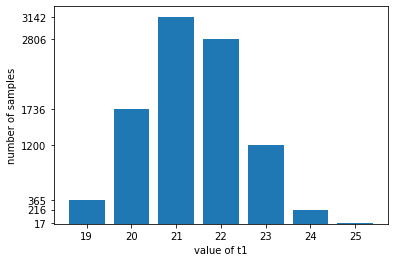

In [18]:
bit=46
path = '../input/ost{}.csv'.format(bit)
df = pd.read_csv(path, sep=',')
res = net.make_res_data(df, num_reads)
valid_y_list, valid_y_num, occurrence_list = net.find_valid_y(res)
plot_path = '{}bit/nealSA_{}bit_10000numreads'.format(bit, bit)
hist_dic = net.y_num_hist(df, valid_y_list, plot_path)
print('number of valid y of {}bit data is {}'.format(bit, valid_y_num))
print('p value of {}bit data is {}'.format(bit, hist_dic[np.dot(df['Y'], df['LI'])]/valid_y_num))
print('sample occurrence of {}bit data is {}'.format(bit, sum(occurrence_list)/len(occurrence_list)))

In [21]:
for bit in [20, 25, 30, 35, 40]:
    time_sum = 0
    for num in [0, 1, 2, 3, 4]:
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        res = net.make_res_data(df, num_reads)
        loop = 10
        result = timeit.timeit('net.find_valid_y(res)', globals=globals(), number=loop)
        time_sum += result / loop
    print('mean calculation time of {}bit data is {}'.format(bit, time_sum/5))

mean calculation time of 20bit data is 3.874864271960105
mean calculation time of 25bit data is 6.7706231104201295
mean calculation time of 30bit data is 7.965289265919928
mean calculation time of 35bit data is 8.606998953440051
mean calculation time of 40bit data is 9.080965898620054


In [22]:
bit=46
path = '../input/ost{}.csv'.format(bit)
df = pd.read_csv(path, sep=',')
res = net.make_res_data(df, num_reads)
loop = 10
result = timeit.timeit('net.find_valid_y(res)', globals=globals(), number=loop)
print('calculation time of {}bit data is {}'.format(bit, result/loop))

calculation time of 46bit data is 7.054726538100295
